## Heat equation

$$ \frac{\partial T}{\partial t} = d\cdot \frac{\partial^2 T}{x^2} + S(x,t) \newline$$
$$ T(0,t) = \alpha_0 (t) \newline$$
$$ T(L,t) = \alpha_L (t)\newline$$
$$ T(x,0) = \beta (x)\newline$$

In [5]:
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns
from sklearn.utils.extmath import randomized_svd

In [6]:
#Parameters for the heat equation
N = 100
w = np.zeros(N)
L = 10
h = L / (N+1)
d = 0.1

$$ w` = A \cdot w + b(t) $$

w = \begin{bmatrix}
w_1 (t) \\
w_2 (t) \\
\vdots \\
w_N (t) \\
\end{bmatrix}




A = \frac{d}{h^2} * \begin{bmatrix}
-2 & 1 & 0 & \dots & 0 \\
1 & -2 & 1 & \dots & 0 \\
0 & 1 & -2 & \dots & 0 \\
\vdots & \vdots & \vdots & \ddots & \vdots \\
0 & 0 & 0 & 1 & -2 \\
\end{bmatrix}



In [7]:
#Calculating A matrix 
A = np.diag([-2]*N)+np.diag([1]*(N-1),1)+np.diag([1]*(N-1),-1)
A = A*d/h/h # d h**2
A

array([[-20.402,  10.201,   0.   , ...,   0.   ,   0.   ,   0.   ],
       [ 10.201, -20.402,  10.201, ...,   0.   ,   0.   ,   0.   ],
       [  0.   ,  10.201, -20.402, ...,   0.   ,   0.   ,   0.   ],
       ...,
       [  0.   ,   0.   ,   0.   , ..., -20.402,  10.201,   0.   ],
       [  0.   ,   0.   ,   0.   , ...,  10.201, -20.402,  10.201],
       [  0.   ,   0.   ,   0.   , ...,   0.   ,  10.201, -20.402]])

In [4]:
A.shape

(100, 100)

b (t) = \begin{bmatrix}
S (x_1,t) \\
S (x_2,t) \\
\vdots \\
S (x_N,t) \\
\end{bmatrix} + \begin{bmatrix}
\frac{d}{h^2}\alpha_0 (t)  \\
0 \\
\vdots \\
\frac{d}{h^2}\alpha_L (t) \\
\end{bmatrix}

$$w_i (0) = \beta (x_i) \newline$$


In [8]:
# Initial and boundary conditions

#Source
def S(x, t):
    return np.exp( -(x-L/2)**2 / L/2) + 1/(t+1)
#    return 0

def alpha0( t ):
    return 20 #+ 100 * np.sin( t / 100 )
    
def alphaL( t ):
    return 100 #+ 100 * np.cos( t / 100 )

def beta( x ):
    return 300

#Right side of 𝑤‘=𝐴⋅𝑤+𝑏(𝑡)
def b(t):
    ret = [ S((i+1)*h, t) for i in range(N)]
    ret[0] += d*alpha0(t)/h/h
    ret[-1] += d*alphaL(t)/h/h
    return ret

In [9]:
def F(w, t):
    return (np.dot(A,w))+b(t)

dt = 0.02

w0 = np.array([ beta( (i+1)*h ) for i in range(N) ])

steps = 10_000
X = np.zeros((steps+1,N))
X[0] = w0
for ts in range(steps):
    X[ts+1] = dt*F(X[ts], ts*dt) + X[ts]

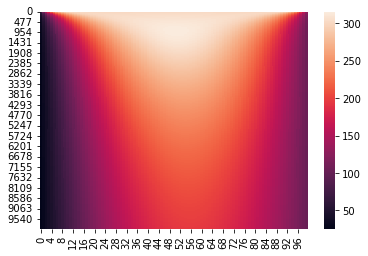

In [10]:
sns.heatmap(X)
plt.show()

### Single Value Decomposition for head equation (How we learned in class)

In [11]:
# Single Value Decomposition
comp = 4
U,s,Vh = randomized_svd(X.T,n_components=comp,random_state=0)

In [12]:
U.shape

(100, 4)

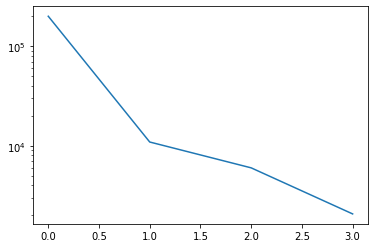

In [13]:
plt.semilogy(s)

<AxesSubplot:>

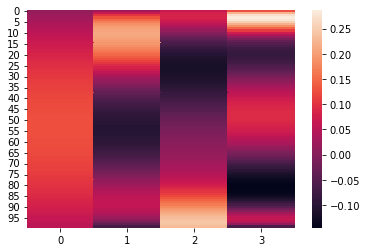

In [14]:
sns.heatmap(U)

### Reduce equation

$$ \alpha´ = A_r \cdot \alpha + b_r \\ \alpha_0 = U_r^T \dot w_0 $$

$$ A_r = U_r^T\cdot A \cdot U_r $$

$$ b_r(t) = U_r^T \cdot b(t) $$

In [15]:
#Compose Ar matrix
Ar = U.T @ A @ U
Ar

array([[-0.03549851,  0.02810282, -0.12565156,  0.01555771],
       [ 0.02810282, -0.16432612,  0.13533741, -0.12012663],
       [-0.12565156,  0.13533741, -0.65468804, -0.03257386],
       [ 0.01555771, -0.12012663, -0.03257386, -0.57453961]])

In [16]:
#Compose br function
def br(t):
    return U.T @ b(t)

In [17]:
def Fr(w, t):
    return (np.dot(Ar,w))+br(t)

dt = 0.02

# w0 = np.array([ beta( (i+1)*h ) for i in range(N) ])
wr0 = U.T@w0


Xr = np.zeros((steps+1,4))
Xr[0] = wr0
for ts in range(steps):
    Xr[ts+1] = dt*Fr(Xr[ts], ts*dt) + Xr[ts]

In [18]:
Xred=U@Xr.T

<AxesSubplot:>

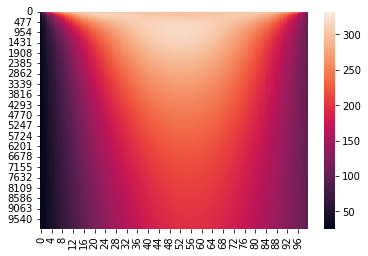

In [19]:
sns.heatmap(Xred.T)

# Project

### Heat equation without reduction the source but separeting it

- Because the source doesn´t depend of the state of the heat in the previus step, 
- it is possible to calculate the source heat independly 
- Here im creating a matrix for the source in position and time

In [20]:
Source_m = np.array([b(ts*dt) for ts in range(steps+1)])
Source_m

array([[2.05320898e+02, 1.31570385e+00, 1.33091409e+00, ...,
        1.33091409e+00, 1.31570385e+00, 1.02140090e+03],
       [2.05301290e+02, 1.29609601e+00, 1.31130625e+00, ...,
        1.31130625e+00, 1.29609601e+00, 1.02138129e+03],
       [2.05282436e+02, 1.27724231e+00, 1.29245255e+00, ...,
        1.29245255e+00, 1.27724231e+00, 1.02136244e+03],
       ...,
       [2.04325874e+02, 3.20679964e-01, 3.35890206e-01, ...,
        3.35890206e-01, 3.20679964e-01, 1.02040587e+03],
       [2.04325873e+02, 3.20679469e-01, 3.35889711e-01, ...,
        3.35889711e-01, 3.20679469e-01, 1.02040587e+03],
       [2.04325873e+02, 3.20678974e-01, 3.35889215e-01, ...,
        3.35889215e-01, 3.20678974e-01, 1.02040587e+03]])

### Reducing the Heat eq (Without reducing the source)

- Changed the profesor code for this part
- In the br(t) function, instead of calculating everytime the b(t), it just checks in the matrix previusly created

In [21]:
# Single Value Decomposition
comp = 4
U,s,Vh = randomized_svd(X.T,n_components=comp,random_state=0)

#Compose Ar matrix
Ar = U.T @ A @ U
Ar

array([[-0.03549851,  0.02810282, -0.12565156,  0.01555771],
       [ 0.02810282, -0.16432612,  0.13533741, -0.12012663],
       [-0.12565156,  0.13533741, -0.65468804, -0.03257386],
       [ 0.01555771, -0.12012663, -0.03257386, -0.57453961]])

In [22]:
#Compose br function
def br(t):
    return U.T @ Source_m[t]

def Fr(w, t):
    return (np.dot(Ar,w))+br(t)

dt = 0.02

# w0 = np.array([ beta( (i+1)*h ) for i in range(N) ])
wr0 = U.T@w0


Xr = np.zeros((steps+1,4))
Xr[0] = wr0
for ts in range(steps):
    Xr[ts+1] = dt*Fr(Xr[ts], ts) + Xr[ts]

<AxesSubplot:>

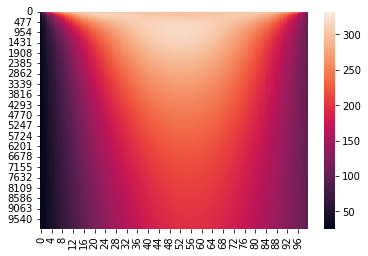

In [23]:
Xred=U@Xr.T
sns.heatmap(Xred.T)

- As you can see, the result is the same as the reduction the professor made in class

## Trying to reduce the source and heat equation

### Reducing the source

In [24]:
Source_m = np.array([b(ts*dt) for ts in range(steps+1)])
Source_m

array([[2.05320898e+02, 1.31570385e+00, 1.33091409e+00, ...,
        1.33091409e+00, 1.31570385e+00, 1.02140090e+03],
       [2.05301290e+02, 1.29609601e+00, 1.31130625e+00, ...,
        1.31130625e+00, 1.29609601e+00, 1.02138129e+03],
       [2.05282436e+02, 1.27724231e+00, 1.29245255e+00, ...,
        1.29245255e+00, 1.27724231e+00, 1.02136244e+03],
       ...,
       [2.04325874e+02, 3.20679964e-01, 3.35890206e-01, ...,
        3.35890206e-01, 3.20679964e-01, 1.02040587e+03],
       [2.04325873e+02, 3.20679469e-01, 3.35889711e-01, ...,
        3.35889711e-01, 3.20679469e-01, 1.02040587e+03],
       [2.04325873e+02, 3.20678974e-01, 3.35889215e-01, ...,
        3.35889215e-01, 3.20678974e-01, 1.02040587e+03]])

- I created the same matrix as before
- But now for each for of the matrix, Im creating a diagonal matrix and applying the SVD
- Then Reducing the source matrix and saving it in the Source_m_red
- Source_m dimentions are Steps x N (this case 10_000, 100)
- Source_m_red dimentions are Steps x comp (this case 10_000, 4)

In [25]:
comp = 4
Source_m_red = np.zeros((steps+1,comp))
for i in range(len(Source_m)):
    U,s,Vh = randomized_svd(np.diag(Source_m[i].T),n_components=comp,random_state=0)
    Sr = U.T @ np.diag(Source_m[i]) @ U
    Source_m_red[i] = Sr.diagonal()

### Reducing the Heat eq

In [26]:
# Single Value Decomposition
U,s,Vh = randomized_svd(X.T,n_components=comp,random_state=0)

#Compose Ar matrix
Ar = U.T @ A @ U
Ar

array([[-0.03549851,  0.02810282, -0.12565156,  0.01555771],
       [ 0.02810282, -0.16432612,  0.13533741, -0.12012663],
       [-0.12565156,  0.13533741, -0.65468804, -0.03257386],
       [ 0.01555771, -0.12012663, -0.03257386, -0.57453961]])

- In the br(t) fuction I remove the U.T @ Source_m[t] because Source_m_red[t] is already the shape (4,)

In [27]:
#Compose br function
def br(t):
    return  Source_m_red[t]

def Fr(w, t):
    return (np.dot(Ar,w))+br(t)

In [28]:
dt = 0.02

# w0 = np.array([ beta( (i+1)*h ) for i in range(N) ])
wr0 = U.T@w0

Xr = np.zeros((steps+1,4))
Xr[0] = wr0
for ts in range(steps):
    Xr[ts+1] = dt*Fr(Xr[ts], ts) + Xr[ts]

In [29]:
Xred=U@Xr.T

<AxesSubplot:>

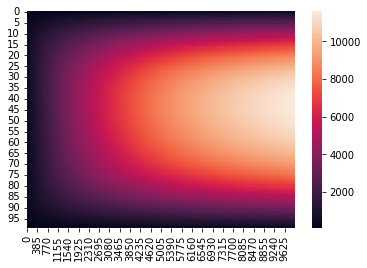

In [30]:
sns.heatmap(Xred)

- As you can see, the result is odd
- It looks like shifted and also the values are way too big